In [51]:
import csv
import pandas as pd
from functools import reduce
import math
import numpy as np
import statistics

1. Compute the median age of the Citibike’s subscribed customers.

In [52]:
#read file
with open("citibike.csv","r") as fi:
    reader = csv.DictReader(fi)
    for row in reader:
        birthyear = row["birth_year"]
        if birthyear != "":
            age = 2023-int(birthyear)
            print(age)

45
30
54
38
66
44
40
68
38
41
35
32
41
33
46
55
33
36
43
63
37
36
54
66
42
30
48
50
50
46
42
32
43
52
39
28
29
55
30
57
39
51
33
42
59
69
39
41
44
37
36
37
31
34
36
32
36
34
43
39
42
33
53
51
50
35
34
53
30
28
62
57
48
49
41
39
48
39
32
39
51
35
43
50
40
34
47
33
44
38
40
53
38
37
62
62
36
39
38
33
33
31
64
44
43
62
31
36
52
58
34
41
54
53
47
57
69
32
38
50
46
62
48
40
35
40
45
37
30
35
45
50
63
33
65
49
47
62
38
50
40
42
30
57
40
34
50
56
34
35
59
38
35
42
47
41
40
33
38
43
38
38
58
32
56
30
47
53
28
37
55
47
33
46
35
31
69
34
38
40
43
42
39
38
39
36
46
41
29
39
40
48
35
33
51
60
43
41
36
38
57
58
36
53
39
39
33
41
47
38
52
66
39
44
59
64
60
52
74
41
65
55
34
43
48
51
40
42
55
40
41
34
43
63
43
51
68
36
59
39
58
48
40
45
56
48
47
34
46
30
30
49
49
53
48
69
68
49
52
65
64
55
59
66
71
48
28
38
48
62
46
43
39
31
36
54
47
42
53
63
39
45
38
43
41
46
53
36
37
31
42
49
36
52
47
69
64
65
32
53
48
64
63
39
71
31
36
42
52
60
40
65
78
75
38
55
31
41
48
45
53
46
39
62
33
49
40
37
53
42
39
57
43
3

In [53]:
#def generator to iterate teh data set only once
def citibike2gen(filename):
    with open("citibike.csv","r") as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            birthyear = row["birth_year"]
            if birthyear != "":
                age = 2023-int(birthyear) #using current year 
                yield age #using yield  it returns a generator object, which can be 
                        #used to iterate over the values produced by the generator function.
count = {}
ages = []
for age in citibike2gen("citibike.csv"):
    ages.append(age)
    count[age] = count.get(age,0)+1

median_age = statistics.median(ages)
print("The median age of customer", median_age)


The median age of customer 46.0


In [54]:
ages

[45,
 30,
 54,
 38,
 66,
 44,
 40,
 68,
 38,
 41,
 35,
 32,
 41,
 33,
 46,
 55,
 33,
 36,
 43,
 63,
 37,
 36,
 54,
 66,
 42,
 30,
 48,
 50,
 50,
 46,
 42,
 32,
 43,
 52,
 39,
 28,
 29,
 55,
 30,
 57,
 39,
 51,
 33,
 42,
 59,
 69,
 39,
 41,
 44,
 37,
 36,
 37,
 31,
 34,
 36,
 32,
 36,
 34,
 43,
 39,
 42,
 33,
 53,
 51,
 50,
 35,
 34,
 53,
 30,
 28,
 62,
 57,
 48,
 49,
 41,
 39,
 48,
 39,
 32,
 39,
 51,
 35,
 43,
 50,
 40,
 34,
 47,
 33,
 44,
 38,
 40,
 53,
 38,
 37,
 62,
 62,
 36,
 39,
 38,
 33,
 33,
 31,
 64,
 44,
 43,
 62,
 31,
 36,
 52,
 58,
 34,
 41,
 54,
 53,
 47,
 57,
 69,
 32,
 38,
 50,
 46,
 62,
 48,
 40,
 35,
 40,
 45,
 37,
 30,
 35,
 45,
 50,
 63,
 33,
 65,
 49,
 47,
 62,
 38,
 50,
 40,
 42,
 30,
 57,
 40,
 34,
 50,
 56,
 34,
 35,
 59,
 38,
 35,
 42,
 47,
 41,
 40,
 33,
 38,
 43,
 38,
 38,
 58,
 32,
 56,
 30,
 47,
 53,
 28,
 37,
 55,
 47,
 33,
 46,
 35,
 31,
 69,
 34,
 38,
 40,
 43,
 42,
 39,
 38,
 39,
 36,
 46,
 41,
 29,
 39,
 40,
 48,
 35,
 33,
 51,
 60,
 43,
 41,
 36,
 38,


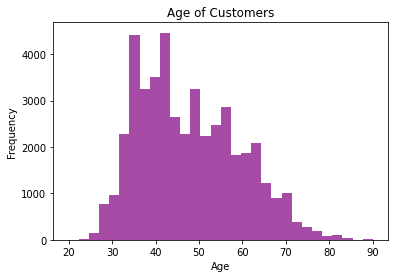

In [55]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#age histogram
n, bins, patches = plt.hist(ages, bins=30, range=(20, 90), color='purple', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of Customers')
plt.show()

In [56]:
#2.A
import pandas as pd
from functools import reduce
import math
import numpy as np

df = pd.read_csv("citibike.csv")
rows = df.values.tolist()

gender = map(lambda x:x[16],rows)
pairs = map(lambda x: (int(x==1),int(x==2)),gender)
result = [sum(x) for x in zip(*pairs)]
print (list(result))

#reduce(lambda(x,y: x value [0] plus y value [0], x value 1 plus y value [1], list(pairs)))
#sum??

[37805, 7848]


In [58]:
#2.B - Count the number of trips per birth year
from functools import reduce
import pandas as pd
import csv
df = pd.read_csv("citibike.csv")
rows = df.values.tolist()

def totaltrips(filename):
    totaltrips = {}
    with open("citibike.csv", "r") as fi:
        reader = csv.DictReader(fi)
        for row in reader:
            birth_year = row['birth_year']
            if birth_year:
                if birth_year not in totaltrips:
                    totaltrips[birth_year] = 0
                totaltrips[birth_year] += 1
    return totaltrips

result = totaltrips('citibike.csv')
print(result)



#math.isnan
#birth = list(map(lambda x: x.split("-")[0], birth_years))
#counts = defaultdict(int)
#for year in birth:
#    counts[year] += 1
#print(result)



{'1978': 1377, '1993': 470, '1969': 1133, '1985': 1673, '1957': 449, '1979': 1279, '1983': 1793, '1955': 413, '1982': 1455, '1988': 1358, '1991': 922, '1990': 1361, '1977': 1122, '1968': 1010, '1987': 1730, '1980': 1509, '1960': 771, '1986': 1568, '1981': 1499, '1975': 1071, '1973': 1022, '1971': 1162, '1984': 1714, '1995': 256, '1994': 392, '1966': 863, '1972': 1081, '1964': 891, '1954': 417, '1992': 493, '1989': 1322, '1970': 1347, '1961': 618, '1974': 1158, '1976': 1168, '1959': 687, '1965': 947, '1958': 783, '1967': 999, '1963': 970, '1949': 134, '1952': 247, '1945': 28, '1948': 149, '1997': 94, '1996': 124, '1962': 899, '1950': 150, '1944': 59, '1953': 346, '1956': 488, '1951': 229, '1941': 39, '1938': 24, '1934': 8, '1947': 74, '1942': 61, '1940': 21, '1943': 18, '1946': 93, '1998': 59, '1900': 22, '1999': 17, '1935': 9, '1939': 4, '1910': 2, '1926': 1, '1929': 1, '1901': 1, '1922': 4}


In [ ]:
#3 - birth years of the first riders each day for problem.

